
## Mini PJT

### Predict California Housing by Simple Linear Regression
- source: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
- data: 20640 rows, 8 columns

### column information
- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

### 1. 데이터 및 라이브러리 불러오기

In [95]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# California 데이터 불러오기
from sklearn.datasets import fetch_california_housing

raw_data = fetch_california_housing()
raw_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

- dictionary 형태
- data 또한 numpy array 형태

In [97]:
data = fetch_california_housing(as_frame=True)['data']
target = fetch_california_housing(as_frame=True)['target']

In [98]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [99]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [100]:
df = pd.concat([data, target], axis=1)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 2. Data Preprocessing

1. 결측치 확인

2. feature selection

In [101]:
# 결측치 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


- non-null이 일정하고, Dtype이 float이다
- cf. 만일 null 카운트 되지 않는 ' '이나 '/' 같은 결측치가 있으면 Dtype이 object이다

In [102]:
# feature selection: 집값을 예측하는 데에 필요없는 column을 제거하기
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- 분석가에 따라 latitude와 longitude를 지우기도 하는데, 이번 플젝에서는 한번 써보기로 한다
- 즉, EDA 전까지 아직 컬럼을 지우지 않은 상태로 분석을 진행해보겠다

### 3. EDA

- feature distribution

- target distribution



In [103]:
df.keys()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [104]:
sns.set_style('darkgrid')

<Axes: xlabel='MedInc', ylabel='Count'>

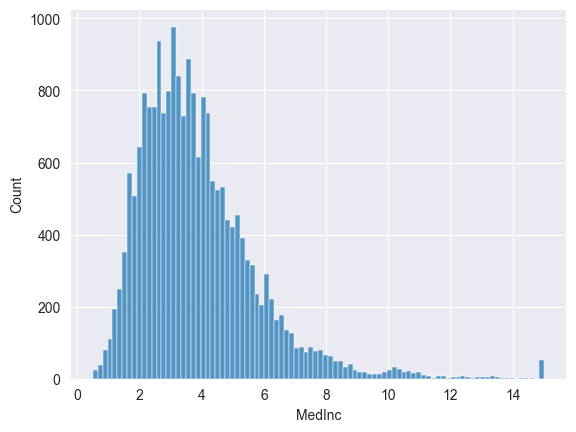

In [105]:
# feature distribution
sns.histplot(data=df, x='MedInc')

- 보통 income과 같은 컬럼은 끝으로 갈수록 낮아지는 분포를 지니지만 이 분포는 마지막에 갑자기 조금 카운트가 커짐
- 이는 상한선을 정해둔 다음 이 상한선을 넘으면 똑같이 코딩한 케이스일 수도 있음

<Axes: xlabel='HouseAge', ylabel='Count'>

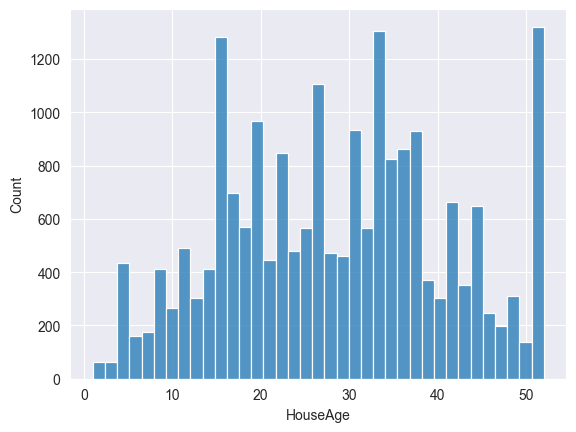

In [106]:
sns.histplot(data=df, x='HouseAge')

- 다양하게 분포가 되어있다. 오래된 집이 꽤 많다

<Axes: xlabel='AveRooms', ylabel='Count'>

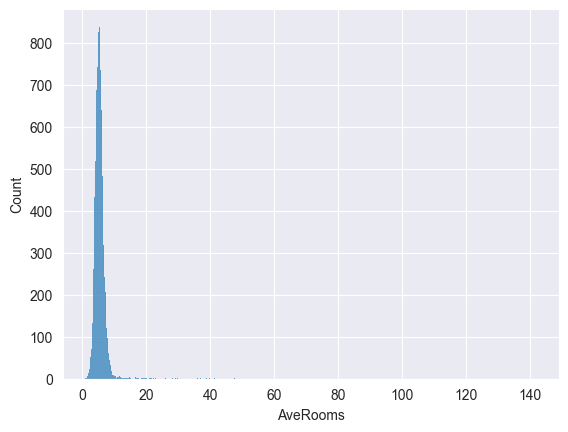

In [107]:
sns.histplot(data=df, x='AveRooms')

- 이상치 존재 가능성을 확인하기 위해 boxplot을 그려본다

<Axes: xlabel='AveRooms'>

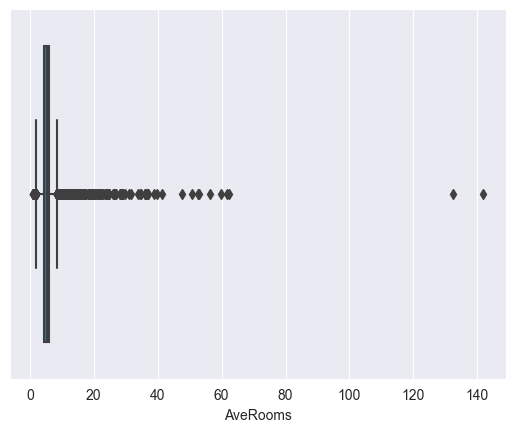

In [108]:
sns.boxplot(data=df, x='AveRooms')

- 이상치가 너무 많아 모두 처리하는 것은 무리다
- 확실하게 떨어진 두개의 데이터(100을 넘김)에 대한 이상치 처리를 해도 될 듯하다

<Axes: xlabel='AveBedrms', ylabel='Count'>

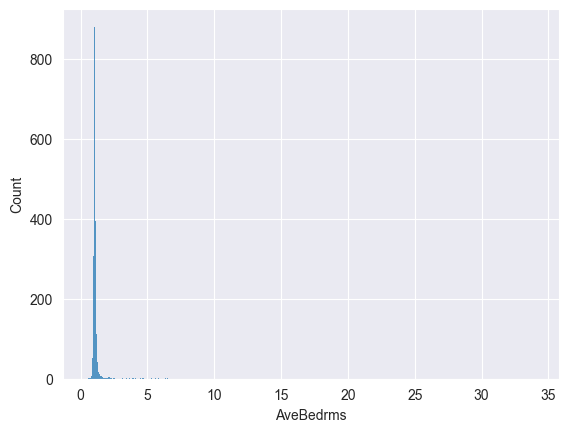

In [109]:
sns.histplot(data=df, x='AveBedrms')

- 이상치 존재 가능성을 확인하기 위해 boxplot을 그려본다

<Axes: xlabel='AveBedrms'>

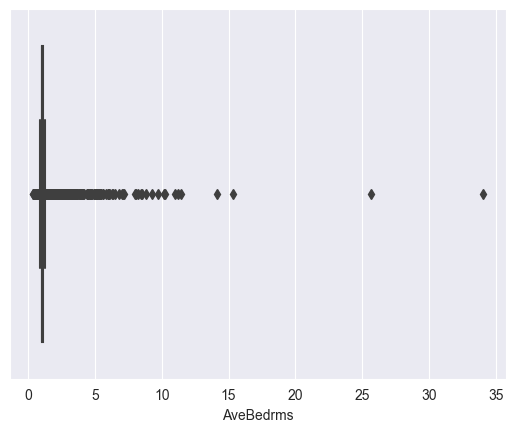

In [110]:
sns.boxplot(data=df, x='AveBedrms')

In [111]:
df.AveBedrms.max()

34.06666666666667

- 가장 큰 데이터가 34이므로 심각한 outlier가 아니다
- 이상치 처리를 굳이 안해도 될 듯하다

<Axes: xlabel='Population', ylabel='Count'>

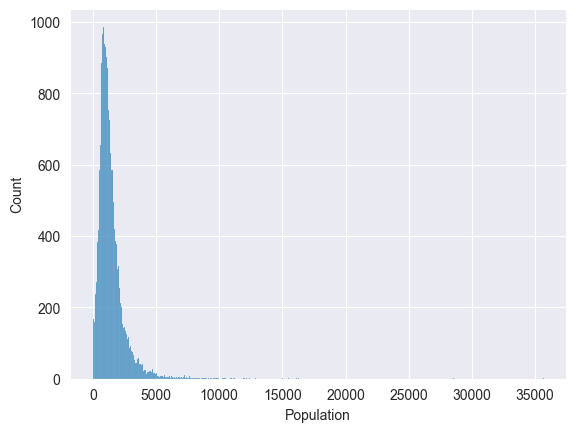

In [112]:
sns.histplot(data=df, x='Population')

<Axes: xlabel='Population'>

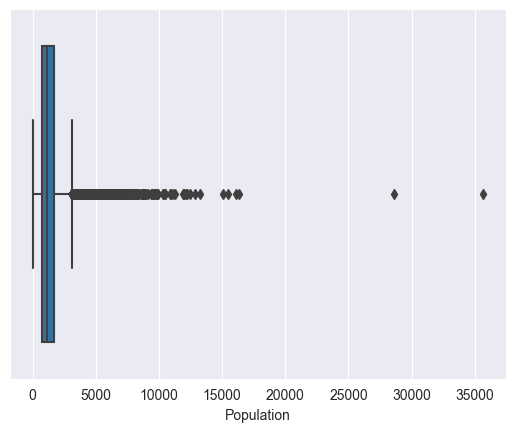

In [113]:
sns.boxplot(data=df, x='Population')

- 마찬가지로 skewed한 분포를 보이지만 잘못 작성된 데이터로 보이진 않는다
- 즉 타당한 값으로 보이기 때문에 이상치 처리는 우선 보류한다

<Axes: xlabel='AveOccup', ylabel='Count'>

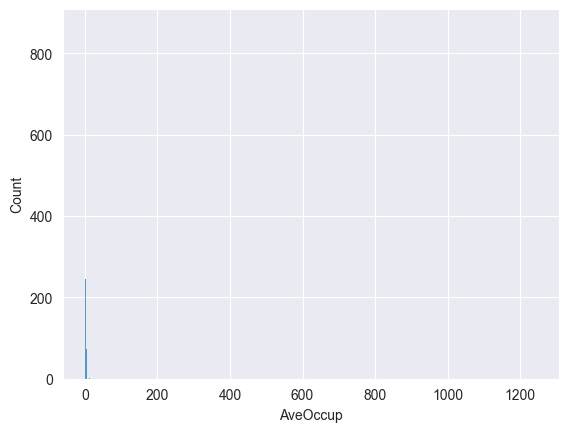

In [114]:
sns.histplot(data=df, x='AveOccup')

<Axes: xlabel='AveOccup'>

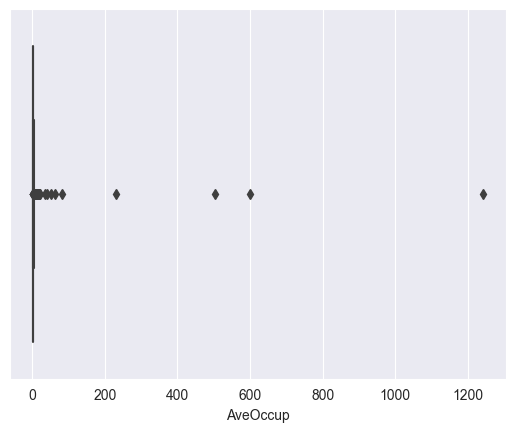

In [115]:
sns.boxplot(data=df, x='AveOccup')

- 대부분의 데이터가 0 부근에 있는 것을 보아 심각한 skewed 분포를 보임

In [116]:
df.AveOccup.value_counts()

3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64

- Length가 18841인 것을 보아 거의 unique한 컬럼

<Axes: xlabel='Latitude', ylabel='Count'>

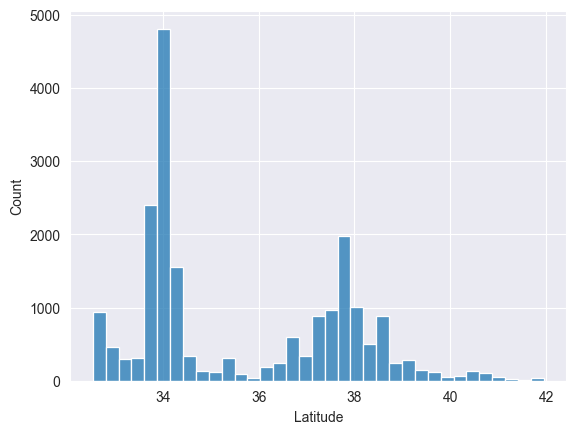

In [117]:
sns.histplot(data=df, x='Latitude')

<Axes: xlabel='Longitude', ylabel='Count'>

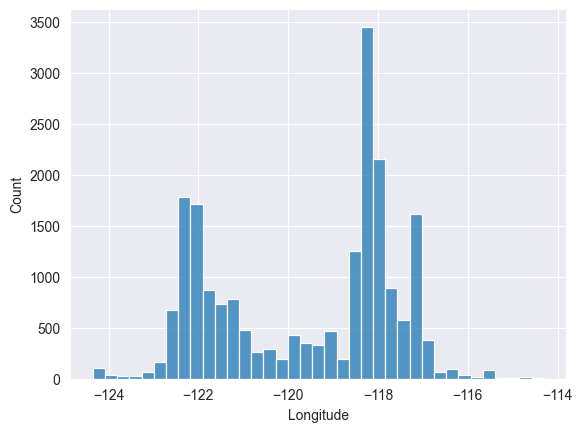

In [118]:
sns.histplot(data=df, x='Longitude')

- Latitude와 Longitude는 분포에 큰 문제점을 보이지 않는다

<Axes: xlabel='MedHouseVal', ylabel='Count'>

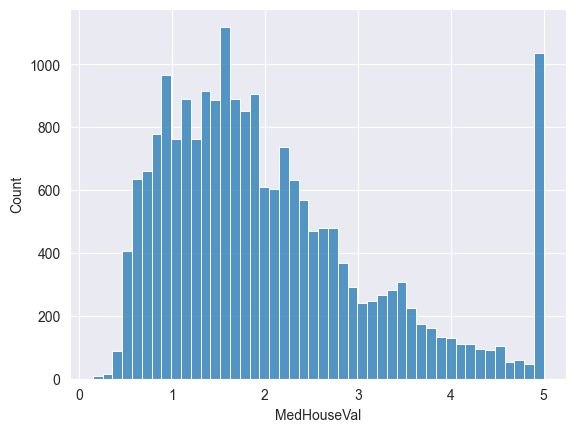

In [119]:
# target distribution
sns.histplot(data=df, x='MedHouseVal')

- 마찬가지로 상한선을 정해 코딩한 것으로 보인다
- regression은 구체적인 값을 예측하는 것이기 때문에 분석가에 따라 상한 경계값에 해당하는 값들을 조정할 수도 있다

<Axes: >

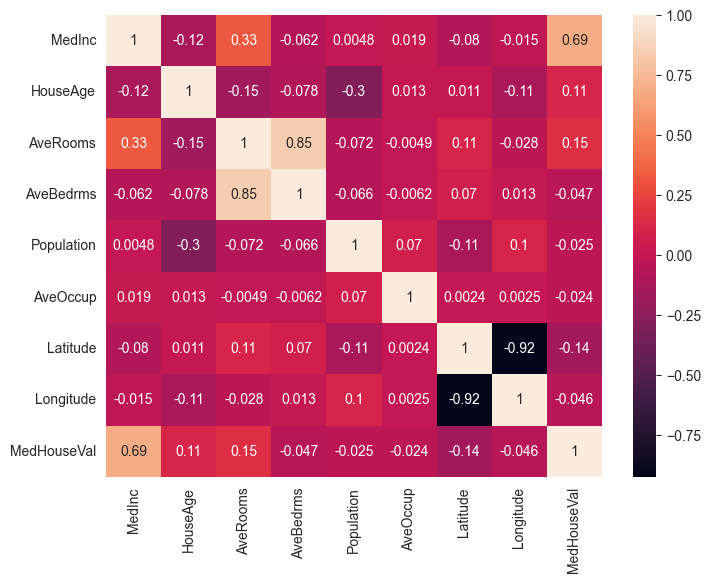

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

- MedInc와 MedHouseVal(target)과 상당히 높은 상관관계를 보인다 -> feature importance가 높다
- AveRooms와 AveBedrms는 서로 상관관계가 상당히 높다 -> 둘 중 하나만 써야 한다
- Latitude와 Longitude도 서로 상관관계가 상당히 높다 -> 둘 중 하나만 써야 한다
- 이외에도 Population와 HouseAge, MedInc과 AveRooms 등이 살짝의 경향성을 보인다 (약 0.3)

<Axes: >

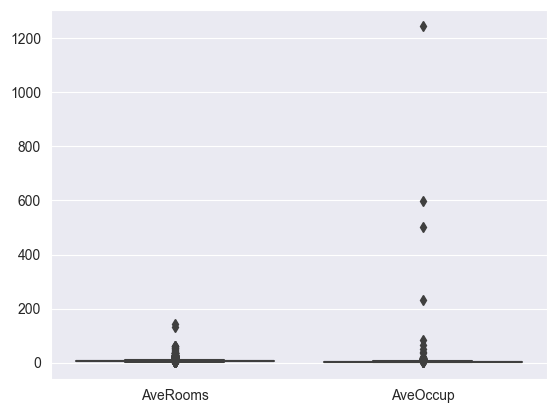

In [121]:
# EDA에 따라 전처리 필요성을 보인 컬럼들을 다시 보자
sns.boxplot(data=df.loc[:, ['AveRooms', 'AveOccup']])

- AveRooms는 최대값 두개, AveOccup은 200 이상값들에 대한 전처리가 필요할 듯하다

In [122]:
df[df.AveRooms > 100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


- MedInc나 MedHouseVal에 규칙이 보이지 않는다
- 따라서 1914, 1979 row를 제거한다

In [123]:
df[df.AveOccup > 200]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


- 컬럼들에서 규칙이 보이지 않는다
- 따라서 3364, 13034, 16669, 19006 row를 제거한다

In [124]:
df.drop(index=[1914, 1979, 3364, 13034, 16669, 19006], inplace=True)

In [125]:
df.shape    # 20640 -> 20634

(20634, 9)

In [126]:
# 다중공선성을 해칠 수 있는 컬럼도 제외해준다
df.drop(columns=['AveBedrms', 'Longitude'], inplace=True)

In [127]:
df.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,3.422


- 이와 같이 regression을 할 땐 outlier와 collinearity에 대한 전처리가 반드시 필요하다

### 4. Training

- train-test split

- Standardization

- Model training

- Hyper-parameter tuning

- Evaluation

In [128]:
# 학습을 위한 training / test dataset 나누기
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df.MedHouseVal

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=82)

# validation set: train set에 대해 한번 더 train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=82)

# 확인하기
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(12380, 6) (4127, 6) (4127, 6)
(12380,) (4127,) (4127,)


- train:validation:test = 6:2:2

In [129]:
# feature scaling: Standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

In [130]:
X_train

array([[ 2.14017659, -0.76621297,  0.26194931,  1.15796749,  1.40934669,
        -0.74163558],
       [ 0.53057373, -0.44663489,  0.58679058,  0.38774992,  0.03286642,
         1.18477243],
       [ 0.18442201, -0.04716229,  0.07643129,  0.33101515, -0.14932111,
        -0.7933197 ],
       ...,
       [-0.67325267,  0.35231031, -0.29563135, -0.39880039, -0.36356986,
         1.02032296],
       [ 2.0349596 , -0.20695133,  0.14113289, -1.18878916,  3.49291147,
         0.84177783],
       [ 0.37076252,  0.51209935,  0.13971188, -0.50711223,  0.01110515,
        -0.79801826]])

In [131]:
# 학습을 위한 라이브러리 세팅: LinearRegression, Lasso, Ridge, XGBoost, LightGBM
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [136]:
def training(model, x_train, x_val, y_train, y_val):
    model.fit(x_train, y_train)
    pred_train = model.predict(x_train)
    pred_val = model.predict(x_val)
    mse_train = mean_squared_error(y_train, pred_train)
    mse_val = mean_squared_error(y_val, pred_val)
    return mse_train, mse_val

reg1 = LinearRegression()
reg2 = Lasso()
reg3 = Ridge()
reg4 = XGBRegressor()
reg5 = LGBMRegressor()

print(f"1. Linear Regression, train/val: {np.round(training(reg1, X_train, X_val, y_train, y_val)[0],4)}, {np.round(training(reg1, X_train, X_val, y_train, y_val)[1], 4)}")
print(f"2. Lasso, train/val: {np.round(training(reg2, X_train, X_val, y_train, y_val)[0],4)}, {np.round(training(reg2, X_train, X_val, y_train, y_val)[1], 4)}")
print(f"3. Ridge, train/val: {np.round(training(reg3, X_train, X_val, y_train, y_val)[0],4)}, {np.round(training(reg3, X_train, X_val, y_train, y_val)[1], 4)}")
print(f"4. XGBRegression, train/val: {np.round(training(reg4, X_train, X_val, y_train, y_val)[0],4)}, {np.round(training(reg4, X_train, X_val, y_train, y_val)[1], 4)}")
print(f"5. LGBMRegression, train/val: {np.round(training(reg5, X_train, X_val, y_train, y_val)[0],4)}, {np.round(training(reg5, X_train, X_val, y_train, y_val)[1], 4)}")

1. Linear Regression, train/val: 0.5982, 0.5949
2. Lasso, train/val: 1.3256, 1.295
3. Ridge, train/val: 0.5982, 0.5949
4. XGBRegression, train/val: 0.137, 0.3949
5. LGBMRegression, train/val: 0.2377, 0.3578


- MSE는 낮을수록 성능이 좋다는 뜻이다
- 즉, XGB와 LightGBM이 좋은 성능을 보인다
- 단, 방금 확인한 것은 "학습"에 대한 성능이지 예측에 대한 성능은 아니다.
- 즉 이 단계에선 baseline model 선정을 할 수 있는 것이다

### 5. Test(Prediction)

In [137]:
# training set과 같은 전처리
X_test = scaler.fit_transform(X_test)

In [139]:
# prediction
def prediction(model, x_test, y_test):
    pred_test = model.predict(x_test)
    return mean_squared_error(y_test, pred_test)

print(f"1. Linear Regression MSE: {np.round(prediction(reg1, X_test, y_test),4)}")
print(f"2. Lasso MSE: {np.round(prediction(reg2, X_test, y_test),4)}")
print(f"3. Ridge MSE: {np.round(prediction(reg3, X_test, y_test),4)}")
print(f"4. XGBRegression MSE: {np.round(prediction(reg4, X_test, y_test),4)}")
print(f"5. LGBMRegression MSE: {np.round(prediction(reg5, X_test, y_test),4)}")

1. Linear Regression MSE: 0.6305
2. Lasso MSE: 1.3848
3. Ridge MSE: 0.6305
4. XGBRegression MSE: 0.3837
5. LGBMRegression MSE: 0.3653


- test에서도 XGBoost와 LightGBM에서 높은 성능을 보인다
- baseline model로 LightGBM을 선정한 후, 하이퍼파라미터 튜닝을 통해 성능을 더 높여보자

### 6. Hyper-parameter tuning

In [141]:
# Hyper-parameter tuning: GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [3, 5, -1],
             "learning_rate": [0.1, 0.01],
             "n_estimators": [50, 100, 200]}

gcv = GridSearchCV(reg5, param_grid, scoring="neg_mean_squared_error")
gcv.fit(X_train, y_train)
print(gcv.best_estimator_)      # best_params 적용한 모델
print(gcv.best_params_)

LGBMRegressor(n_estimators=200)
{'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}


- max_depth: 트리 최대 깊이 (default: -1, 제한 없음)
- learning_rate: 학습률 (default: 0.1)
- n_estimators: base learner(Tree) 개수 (default: 100)

In [142]:
final_model = LGBMRegressor(n_estimators=200)
print("After hyper-parameter tuning:")
print(f"LGBMRegression, train/val: {np.round(training(final_model, X_train, X_val, y_train, y_val)[0],4)}, {np.round(training(reg5, X_train, X_val, y_train, y_val)[1], 4)}")
print(f"LGBMRegression MSE: {np.round(prediction(final_model, X_test, y_test),4)}")

After hyper-parameter tuning:
LGBMRegression, train/val: 0.1876, 0.3578
LGBMRegression MSE: 0.3654
